output/0.040


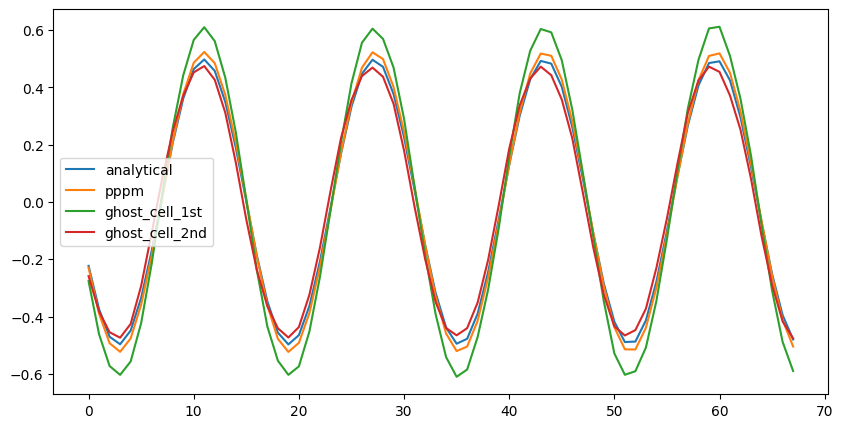

In [13]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

def plot_data(datas, names, labels = None, clip_length = 256):
    xs = np.arange(min([len(data) for data in datas] + [clip_length]))
    plt.figure(figsize=(10, 5))
    for data, name in zip(datas, names):
        plt.plot(xs, data[:clip_length], label=name)
    if labels is not None:
        plt.xticks(xs, labels[:clip_length])
    plt.legend()
    plt.show()

def SNR(ground_truth, prediction):
    return 10 * np.log10(np.mean(ground_truth ** 2) / np.mean((ground_truth - prediction) ** 2))


dirs = glob('output/*')
# sort by name
dirs = sorted(dirs, key=lambda x: x.split('/')[-1])
keys = [dir.split('/')[-1] for dir in dirs]

clip_idx = 256
pppm_data = []
ghost_1st_data = []
ghost_2nd_data = []

pppm_times = []
ghost_1st_times = []
ghost_2nd_times = []

particle_datas = []

for i, dir in enumerate(dirs):
    analytical = np.loadtxt(dir + '/analytical_solution.txt')[clip_idx:]
    pppm = np.loadtxt(dir + '/pppm_solution.txt')[clip_idx:]
    ghost_cell_1st = np.loadtxt(dir + '/ghost_cell_1st.txt')[clip_idx:]
    ghost_cell_2nd = np.loadtxt(dir + '/ghost_cell_2nd.txt')[clip_idx:]
    particle_data = np.loadtxt(dir + '/particle_data.txt')
    
    with open(dir + '/cost_time.txt') as f:
        cost_times = f.readlines()
        pppm_times.append(float(cost_times[0].split('=')[1]))
        ghost_1st_times.append(float(cost_times[1].split('=')[1]))
        ghost_2nd_times.append(float(cost_times[2].split('=')[1]))

    pppm_data.append(SNR(analytical, pppm))
    ghost_1st_data.append(SNR(analytical, ghost_cell_1st))
    ghost_2nd_data.append(SNR(analytical, ghost_cell_2nd))
    particle_datas.append(particle_data)
    
    if (i == 6):
        print(dir)
        plot_data([analytical, pppm, ghost_cell_1st, ghost_cell_2nd], ['analytical', 'pppm', 'ghost_cell_1st', 'ghost_cell_2nd'])
    

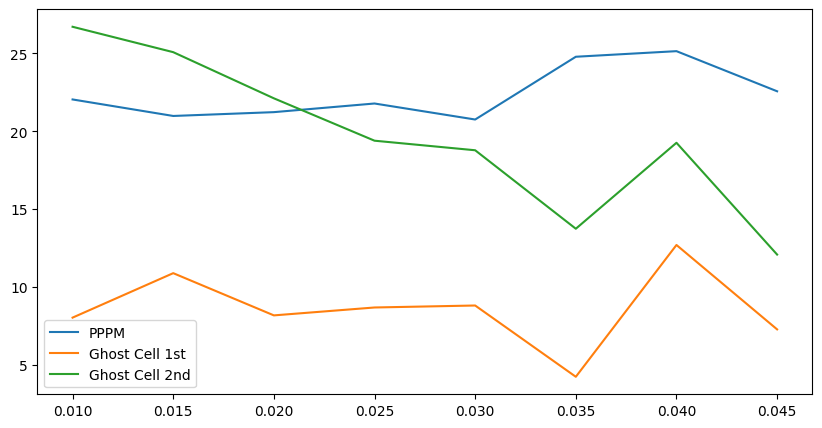

In [14]:
plot_data([pppm_data, ghost_1st_data, ghost_2nd_data], ['PPPM', 'Ghost Cell 1st', 'Ghost Cell 2nd'], labels=keys)

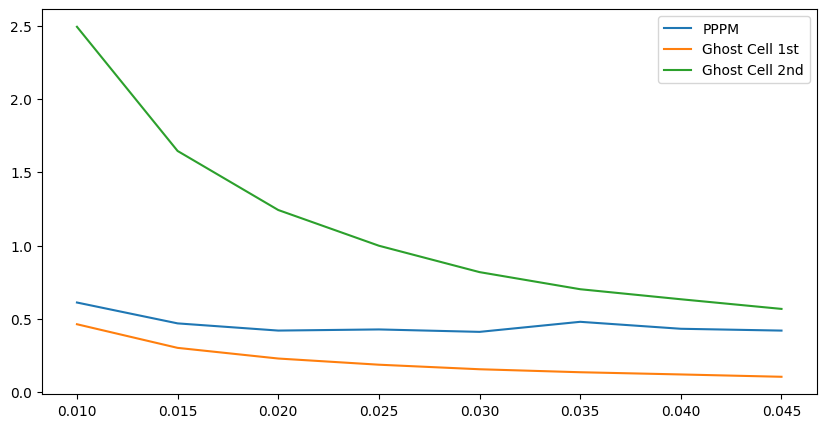

In [15]:
plot_data([pppm_times, ghost_1st_times, ghost_2nd_times], ['PPPM', 'Ghost Cell 1st', 'Ghost Cell 2nd'], labels=keys)

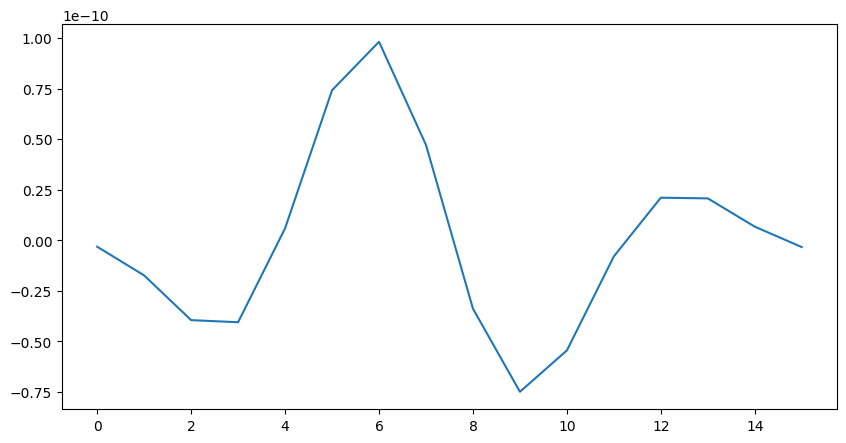

In [16]:
plt.figure(figsize=(10, 5))
for particle_data in particle_datas:
    plt.plot(particle_data[0])
    break
plt.show()